In [3]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pyfftw
pyfftw.interfaces.cache.enable()

import h5py

## 2. Group Speed Test

## -1. Visualize

In [1]:
%matplotlib inline
# %matplotlib widget
import matplotlib.pyplot as plt
plt.style.use('./niceplot2jay.mplstyle')

In [3]:
import h5py
import numpy as np
Ns = [256, 512, 1024]
with h5py.File('fft_benchmark.hdf5', 'r') as f:
  for threads in [1, 4, 8, 16]:
    print([np.mean(f['N{}/threads{}/fftw'.format(N, threads)][:]) for N in Ns])

[0.372880756855011, 4.869474768638611, 37.04633787274361]
[0.1404014527797699, 1.4612691104412079, 15.2135551571846]
[0.11211612820625305, 1.1600772440433502, 9.759486019611359]
[0.07591062784194946, 0.8734670877456665, 8.029167890548706]


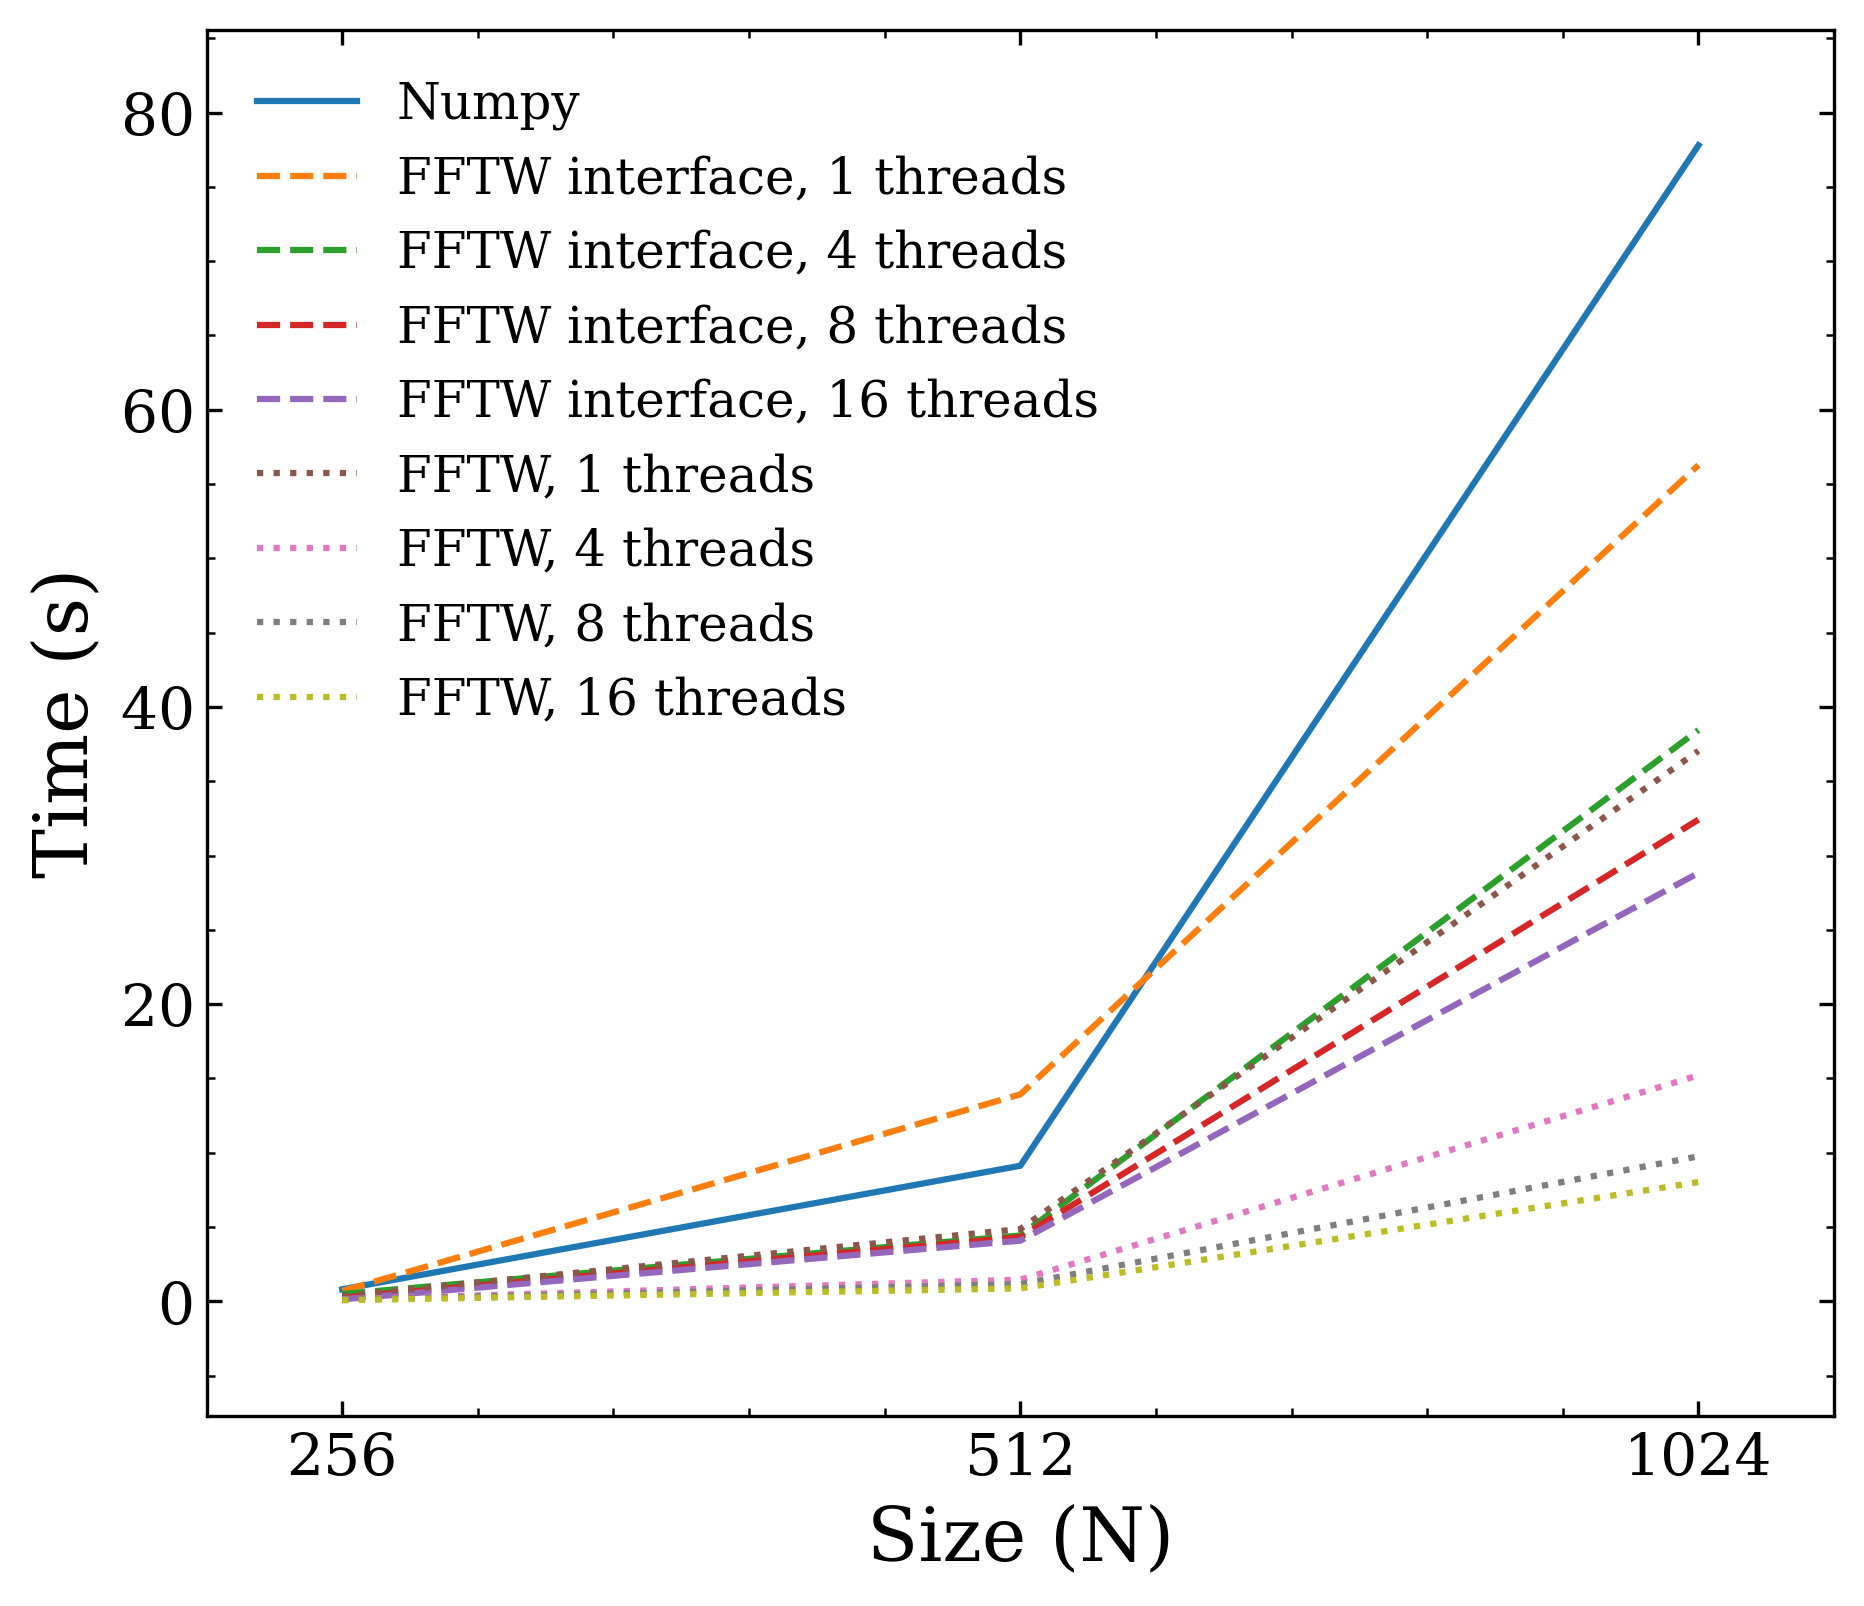

In [29]:
Ns = [256, 512, 1024]
threads_list = [1, 4, 8, 16]
fig, ax = plt.subplots(1,1, figsize=(7,6))
with h5py.File('fft_benchmark.hdf5','r') as f:
  ax.plot(np.log2(Ns), [np.mean(f['N{}/threads1/fft_numpy'.format(N)][:]) for N in Ns], label='Numpy') # type: ignore
  for threads in threads_list:
    ax.plot(np.log2(Ns), [np.mean(f['N{}/threads{}/fftw_interface'.format(N, threads)][:]) for N in Ns], # type: ignore 
            label='FFTW interface, {} threads'.format(threads), linestyle='dashed')
  for threads in threads_list:
    ax.plot(np.log2(Ns), [np.mean(f['N{}/threads{}/fftw'.format(N, threads)][:]) for N in Ns], # type: ignore
            label='FFTW, {} threads'.format(threads), linestyle='dotted')
ax.set_xticks(np.log2(Ns))
ax.set_xticklabels(Ns)
ax.set_xlabel('Size (N)')
ax.set_ylabel('Time (s)')
ax.legend()
plt.show()

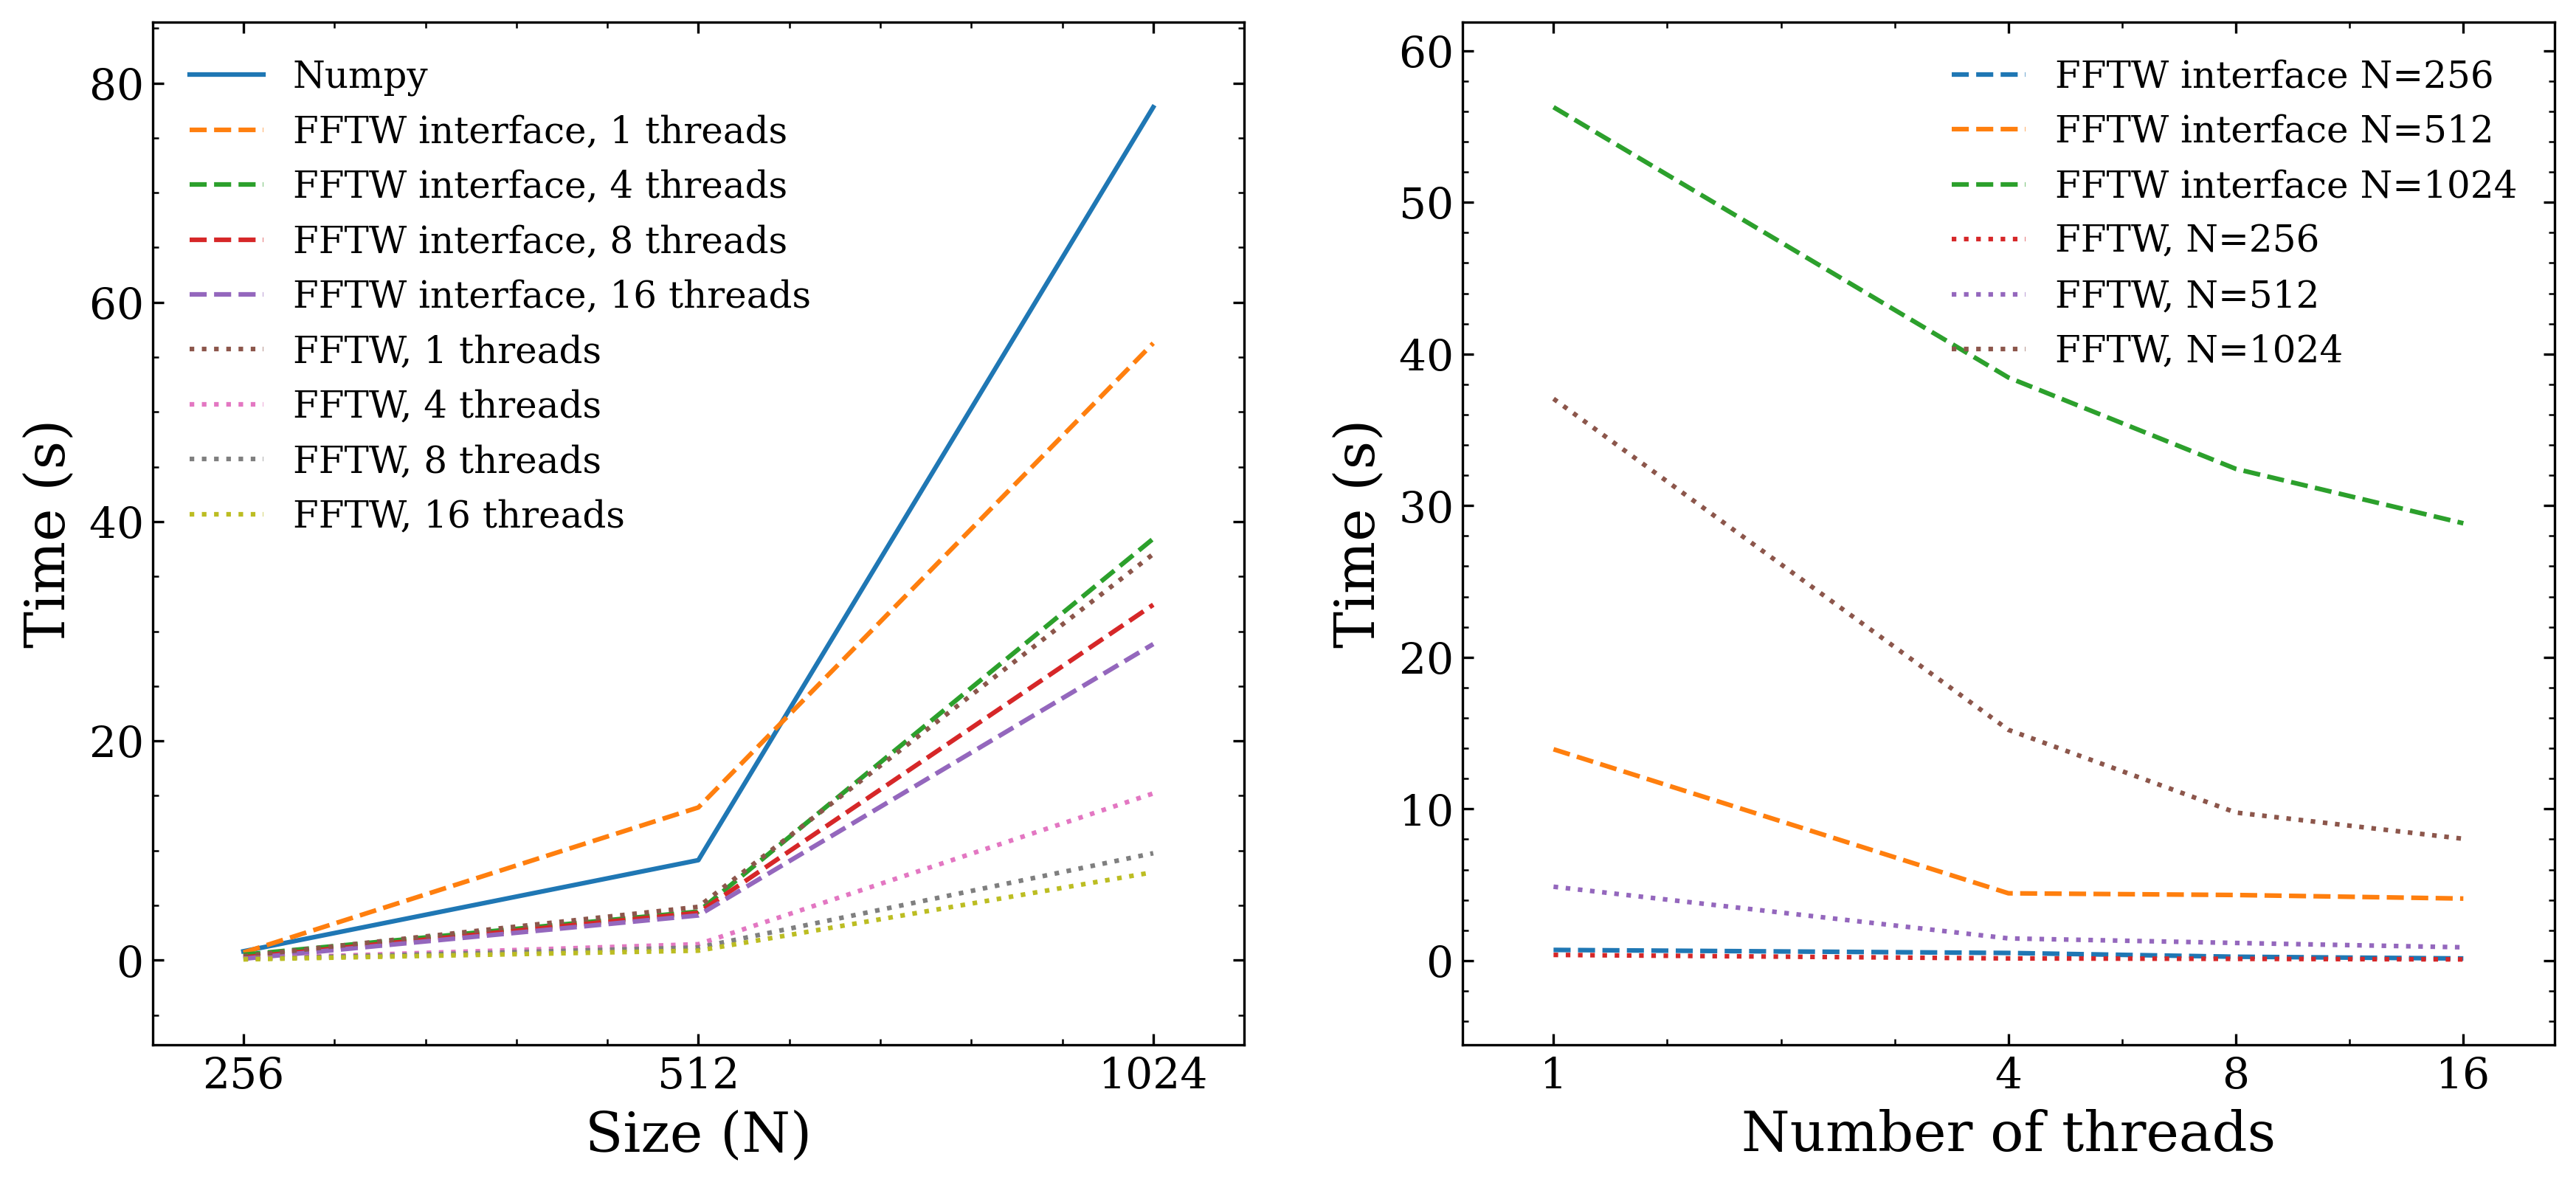

In [44]:
Ns = [256, 512, 1024]
threads_list = [1, 4, 8, 16]
fig, ax = plt.subplots(1,2, figsize=(14,6))
with h5py.File('fft_benchmark.hdf5','r') as f:
  ax[0].plot(np.log2(Ns), [np.mean(f['N{}/threads1/fft_numpy'.format(N)][:]) for N in Ns], label='Numpy') # type: ignore
  for threads in threads_list:
    ax[0].plot(np.log2(Ns), [np.mean(f['N{}/threads{}/fftw_interface'.format(N, threads)][:]) for N in Ns], # type: ignore 
            label='FFTW interface, {} threads'.format(threads), linestyle='dashed')
  for threads in threads_list:
    ax[0].plot(np.log2(Ns), [np.mean(f['N{}/threads{}/fftw'.format(N, threads)][:]) for N in Ns], # type: ignore
            label='FFTW, {} threads'.format(threads), linestyle='dotted')
ax[0].set_xticks(np.log2(Ns))
ax[0].set_xticklabels(Ns)
ax[0].set_xlabel('Size (N)')
ax[0].set_ylabel('Time (s)')
ax[0].legend()

with h5py.File('fft_benchmark.hdf5','r') as f:
  for N in Ns:
    ax[1].plot(np.log2(threads_list), [np.mean(f['N{}/threads{}/fftw_interface'.format(N, threads)][:]) for threads in threads_list],# type: ignore
              label='FFTW interface N={}'.format(N), linestyle='dashed')
  for N in Ns:
    ax[1].plot(np.log2(threads_list), [np.mean(f['N{}/threads{}/fftw'.format(N, threads)][:]) for threads in threads_list], # type: ignore
              label='FFTW, N={}'.format(N), linestyle='dotted')
ax[1].set_xticks(np.log2(threads_list))
ax[1].set_xticklabels(threads_list)
ax[1].set_xlabel('Number of threads')
ax[1].set_ylabel('Time (s)')
ax[1].legend()
plt.show()

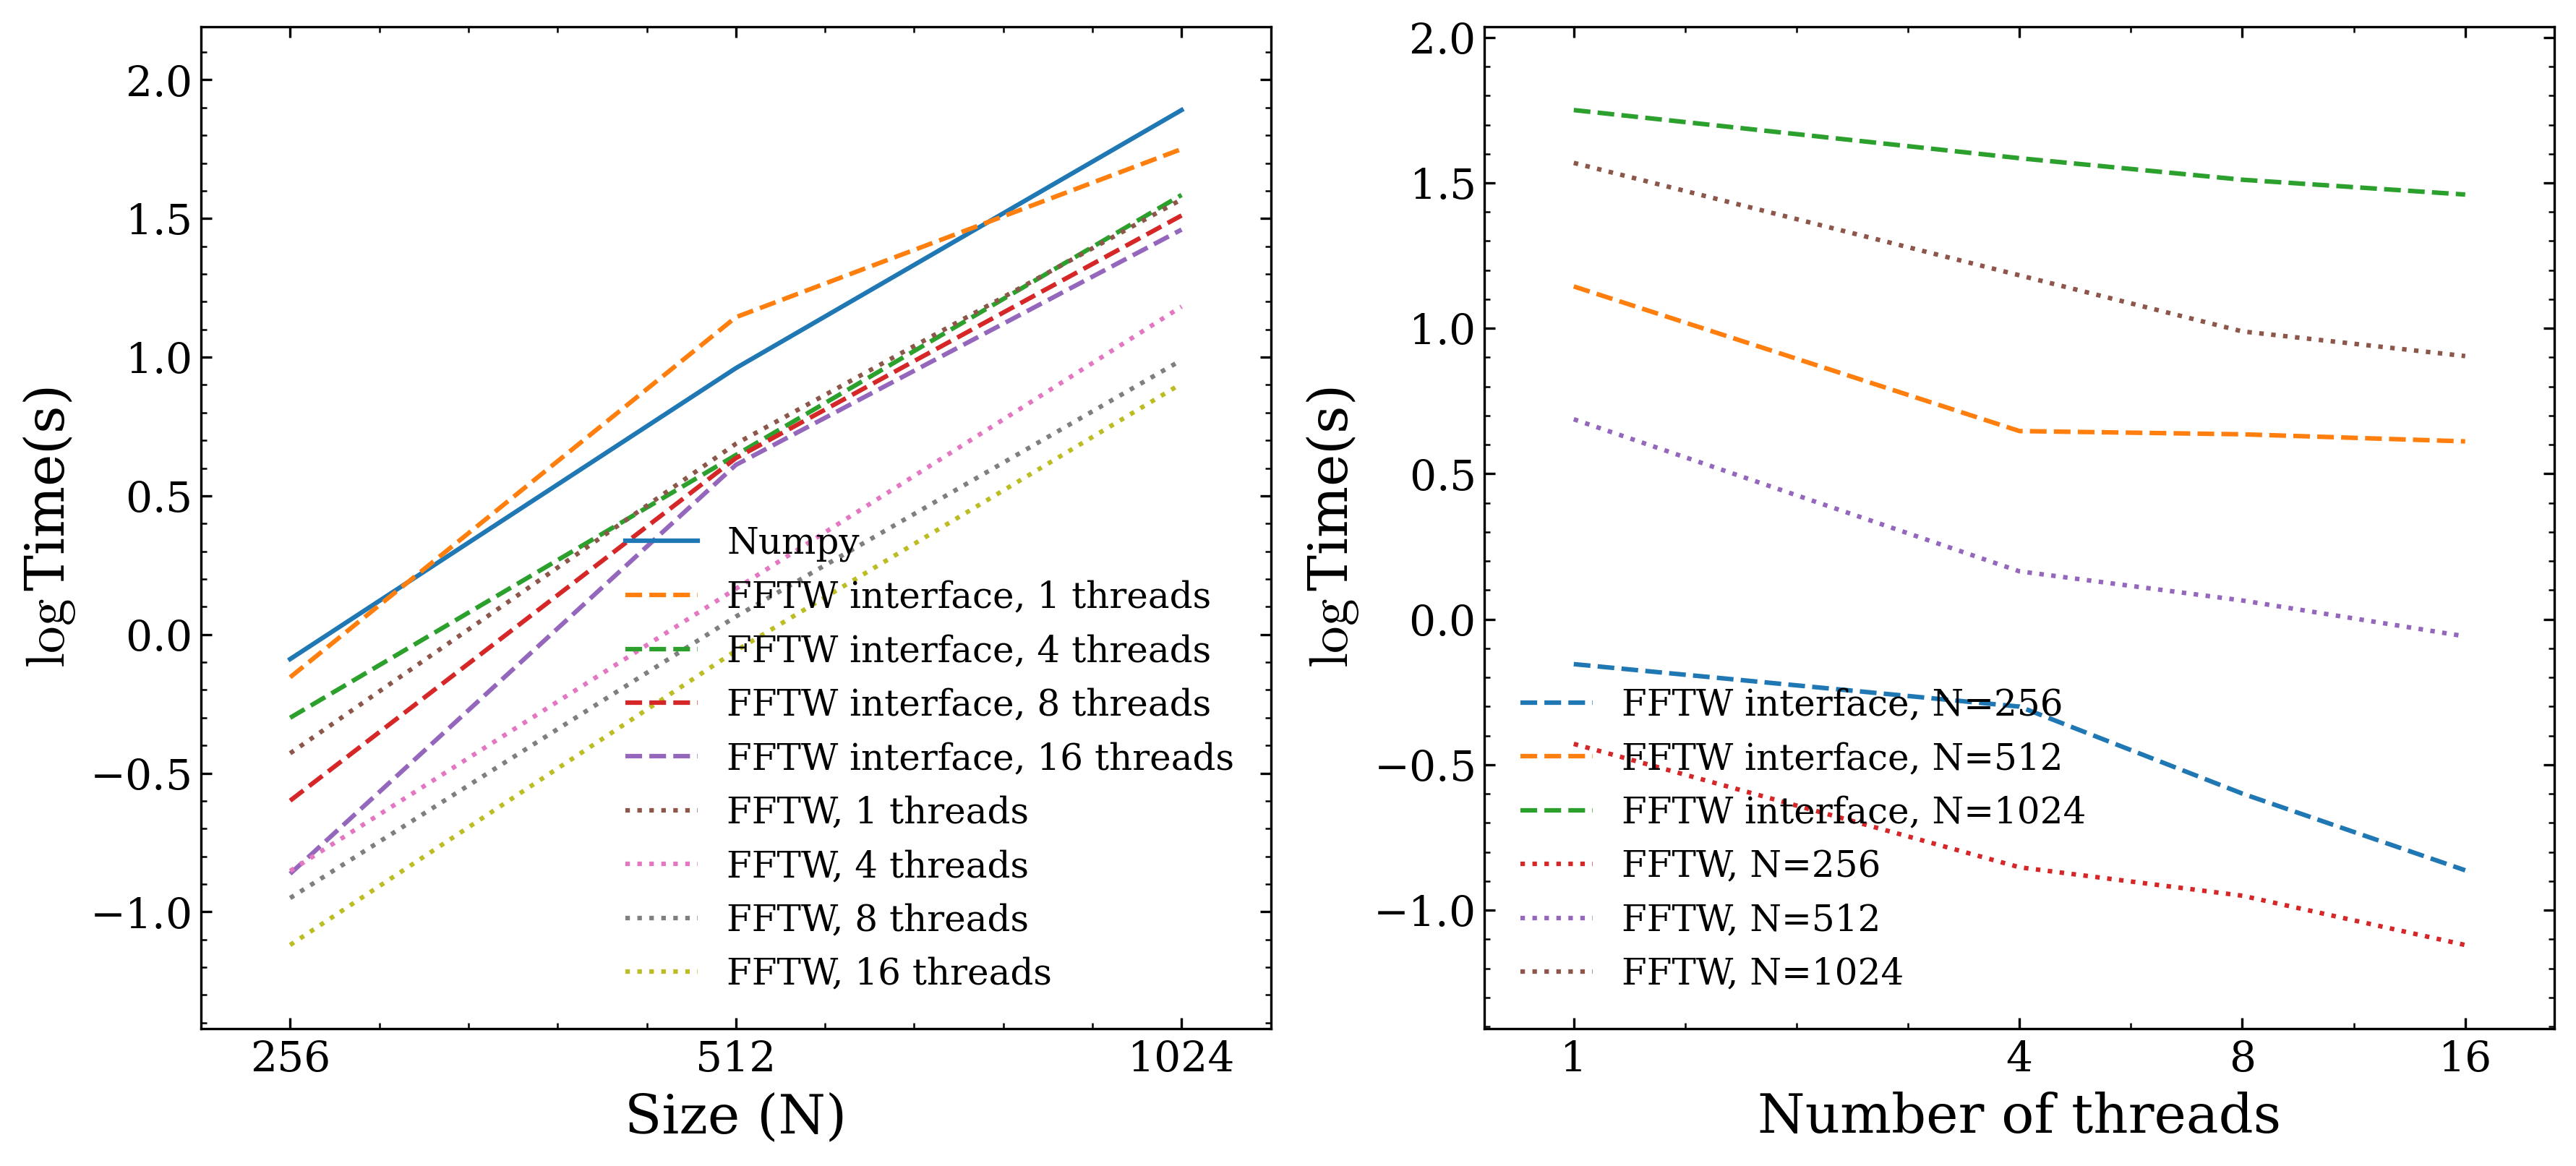

In [42]:
Ns = [256, 512, 1024]
threads_list = [1, 4, 8, 16]
fig, ax = plt.subplots(1,2, figsize=(14,6))
with h5py.File('fft_benchmark.hdf5','r') as f:
  ax[0].plot(np.log2(Ns), [np.log10(np.mean(f['N{}/threads1/fft_numpy'.format(N)][:])) for N in Ns], label='Numpy') # type: ignore
  for threads in threads_list:
    ax[0].plot(np.log2(Ns), [np.log10(np.mean(f['N{}/threads{}/fftw_interface'.format(N, threads)][:])) for N in Ns], # type: ignore 
            label='FFTW interface, {} threads'.format(threads), linestyle='dashed')
  for threads in threads_list:
    ax[0].plot(np.log2(Ns), [np.log10(np.mean(f['N{}/threads{}/fftw'.format(N, threads)][:])) for N in Ns], # type: ignore
            label='FFTW, {} threads'.format(threads), linestyle='dotted')
ax[0].set_xticks(np.log2(Ns))
ax[0].set_xticklabels(Ns)
ax[0].set_xlabel('Size (N)')
ax[0].set_ylabel('$\\log$Time(s)')
ax[0].legend()

with h5py.File('fft_benchmark.hdf5','r') as f:
  for N in Ns:
    ax[1].plot(np.log2(threads_list), [np.log10(np.mean(f['N{}/threads{}/fftw_interface'.format(N, threads)][:])) for threads in threads_list],# type: ignore
              label='FFTW interface, N={}'.format(N), linestyle='dashed')
  for N in Ns:
    ax[1].plot(np.log2(threads_list), [np.log10(np.mean(f['N{}/threads{}/fftw'.format(N, threads)][:])) for threads in threads_list], # type: ignore
              label='FFTW, N={}'.format(N), linestyle='dotted')
ax[1].set_xticks(np.log2(threads_list))
ax[1].set_xticklabels(threads_list)
ax[1].set_xlabel('Number of threads')
ax[1].set_ylabel('$\\log$Time(s)')
ax[1].legend()
plt.show()